In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from csv import reader
from math import sqrt
from math import exp
from math import pi
from scipy import stats

In [132]:
Data = pd.read_csv('Tetuan City power consumption.csv')

In [133]:
Data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [134]:
num_rows, num_columns = Data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 52416
Number of columns: 9


In [135]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [136]:
Data['DateTime'] = pd.to_datetime(Data['DateTime'])

In [137]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


**visualisation**

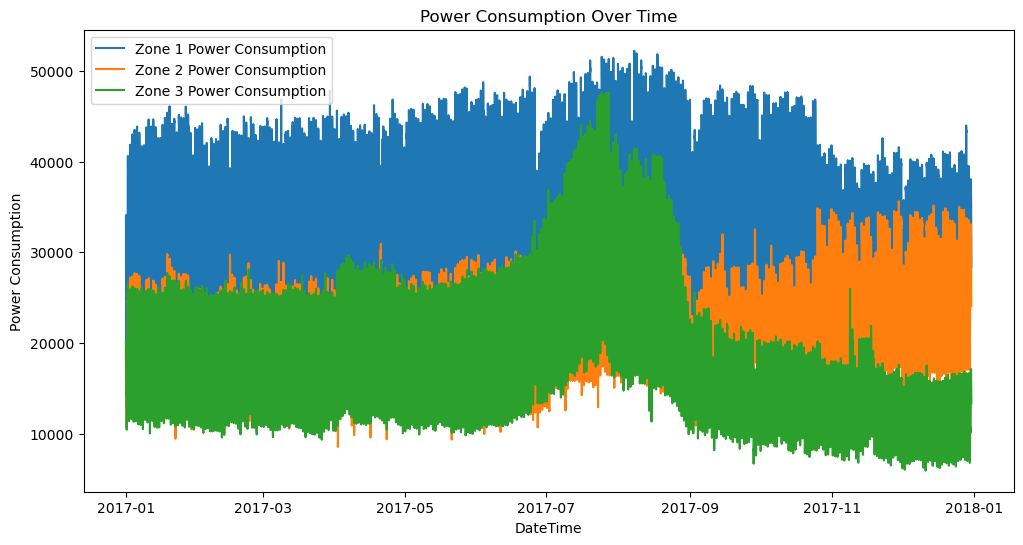

In [138]:
# Visualize over time
plt.figure(figsize=(12, 6))
plt.plot(Data['DateTime'], Data['Zone 1 Power Consumption'], label='Zone 1 Power Consumption')
plt.plot(Data['DateTime'], Data['Zone 2  Power Consumption'], label='Zone 2 Power Consumption')
plt.plot(Data['DateTime'], Data['Zone 3  Power Consumption'], label='Zone 3 Power Consumption')
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.legend()
plt.show()

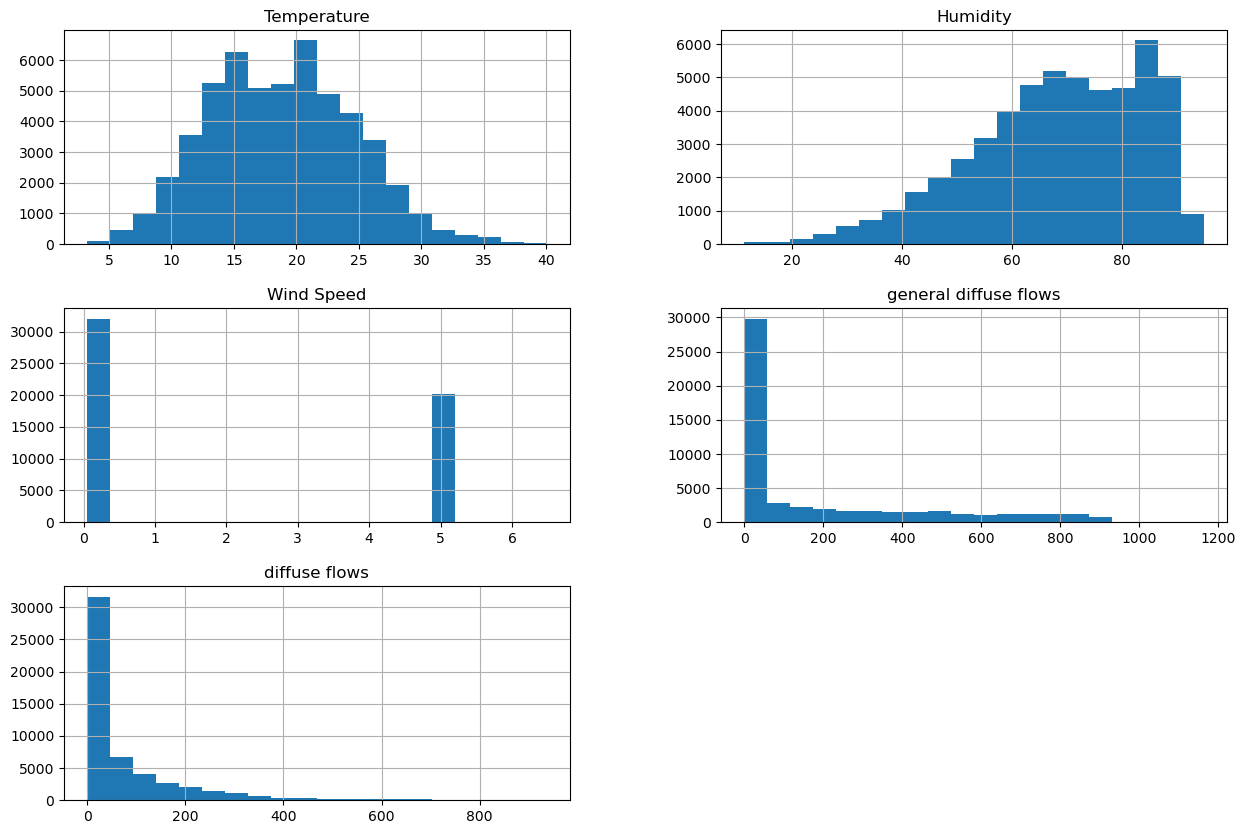

In [139]:
# Histograms for numerical features
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
Data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

In [140]:
  target_variables = [ 'Zone 1 Power Consumption',
    'Zone 2  Power Consumption',
    'Zone 3  Power Consumption' ]

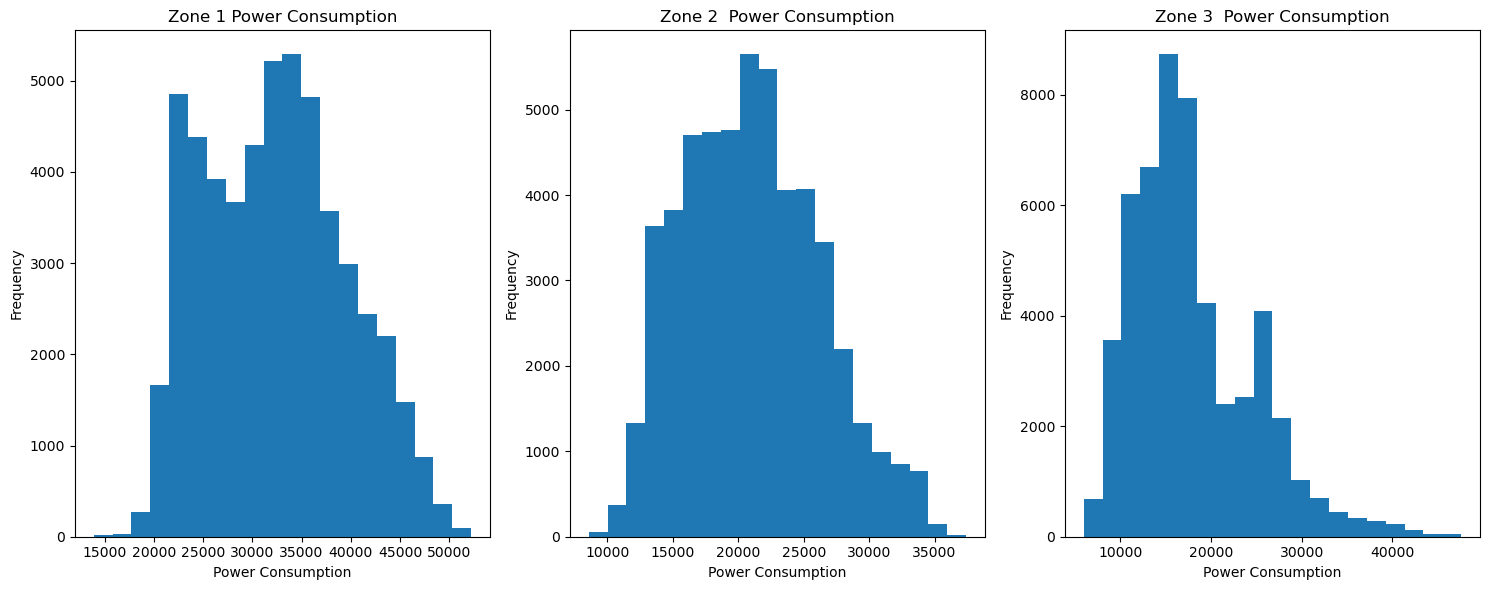

In [141]:
# Boxplot for target variables
plt.figure(figsize=(15, 6))
for i, target in enumerate(target_variables, 1):
    plt.subplot(1, len(target_variables), i)
    plt.hist(Data[target], bins=20)
    plt.title(target)
    plt.xlabel('Power Consumption')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [142]:
print(Data.describe())

                  DateTime   Temperature      Humidity    Wind Speed  \
count                52416  52416.000000  52416.000000  52416.000000   
mean   2017-07-01 23:55:00     18.810024     68.259518      1.959489   
min    2017-01-01 00:00:00      3.247000     11.340000      0.050000   
25%    2017-04-01 23:57:30     14.410000     58.310000      0.078000   
50%    2017-07-01 23:55:00     18.780000     69.860000      0.086000   
75%    2017-09-30 23:52:30     22.890000     81.400000      4.915000   
max    2017-12-30 23:50:00     40.010000     94.800000      6.483000   
std                    NaN      5.815476     15.551177      2.348862   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
count           52416.000000   52416.000000              52416.000000   
mean              182.696614      75.028022              32344.970564   
min                 0.004000       0.011000              13895.696200   
25%                 0.062000       0.122000              26

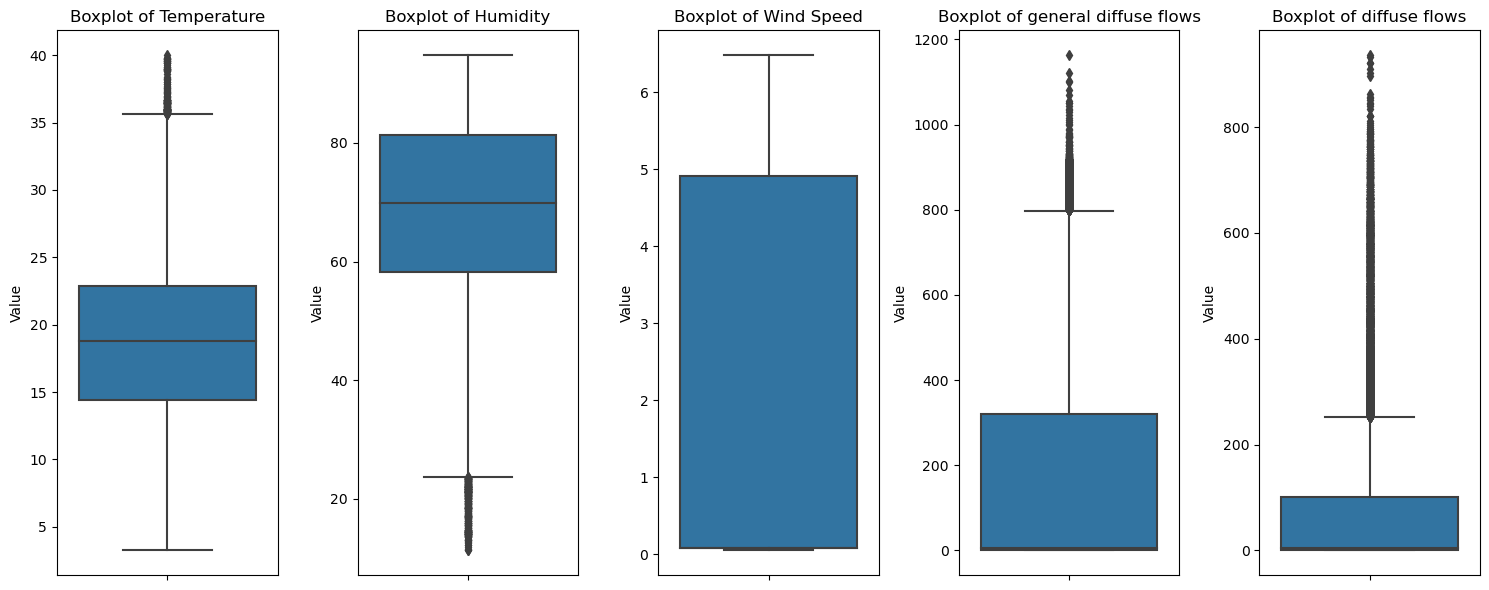

In [143]:
#boxplot of features

plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(y=Data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()


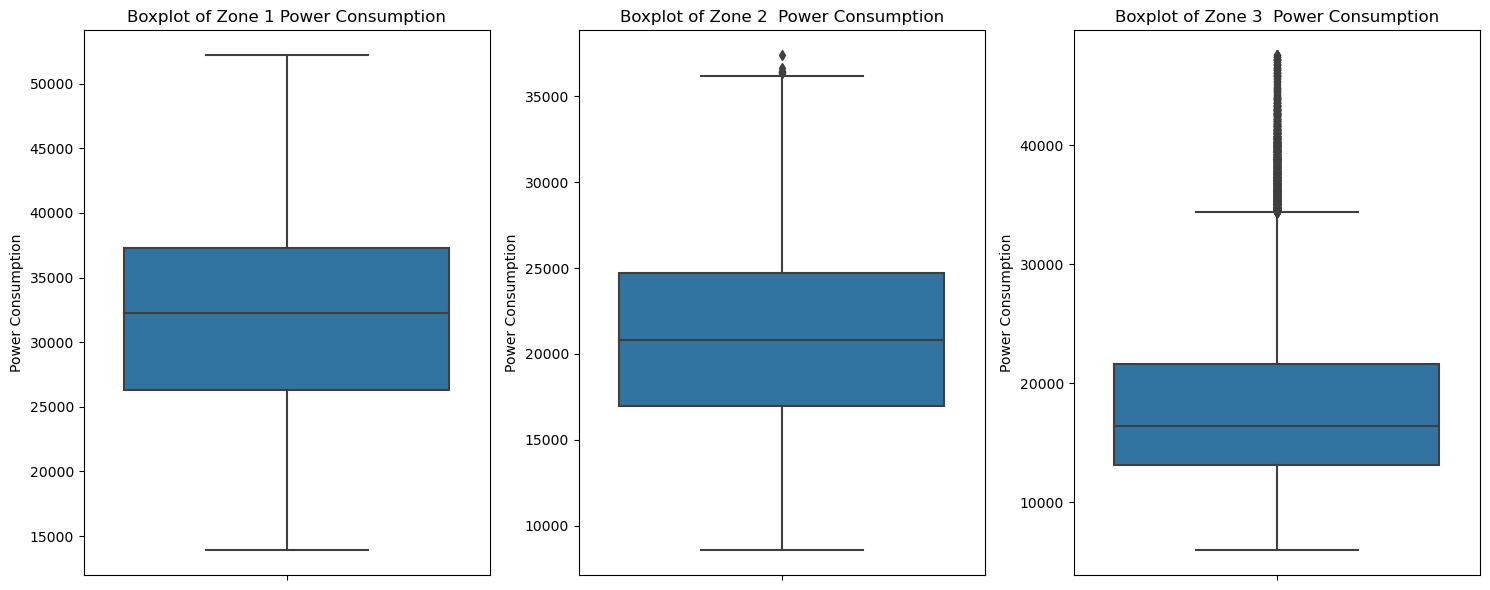

In [144]:
#boxplot of target

plt.figure(figsize=(15, 6))
for i, target in enumerate(target_variables, 1):
    plt.subplot(1, len(target_variables), i)
    sns.boxplot(y=Data[target])
    plt.title(f'Boxplot of {target}')
    plt.ylabel('Power Consumption')
plt.tight_layout()
plt.show()


**correlation analysis**

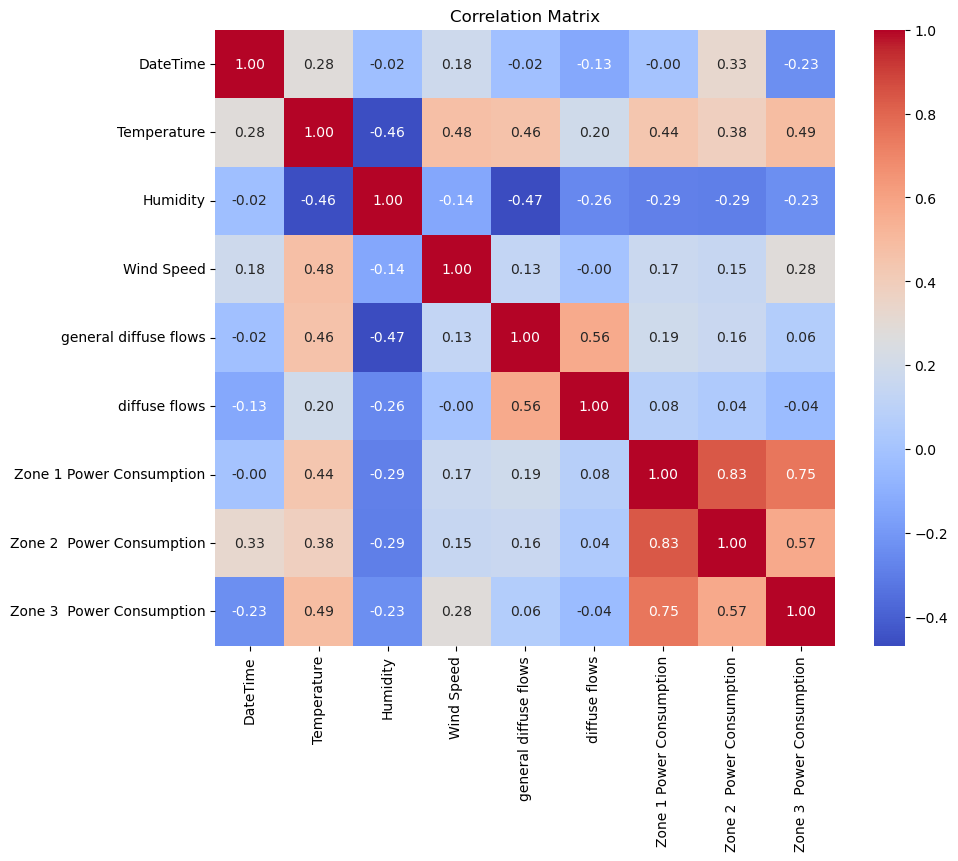

In [145]:
# Compute the correlation matrix
correlation_matrix = Data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**explanation**

This code will compute the correlation matrix for your dataset and plot it as a heatmap. The heatmap will provide a visual representation of the correlations between numerical features and target variables. Positive correlations are represented in warmer colors (towards red), while negative correlations are represented in cooler colors (towards blue).

Interpreting the correlation matrix:

Look for strong correlations (close to 1 or -1) between variables.
Positive correlations indicate that as one variable increases, the other variable tends to increase as well.
Negative correlations indicate that as one variable increases, the other variable tends to decrease.
A correlation close to 0 indicates no linear relationship between the variables.

# **Aggregate by Quarter**

## Non target features

In [146]:
Data_agg_quarter = Data

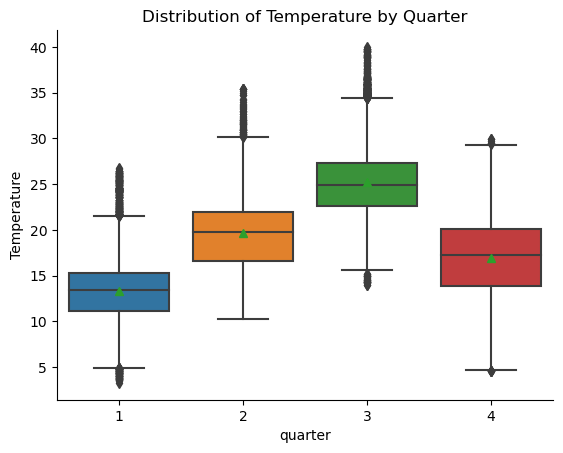

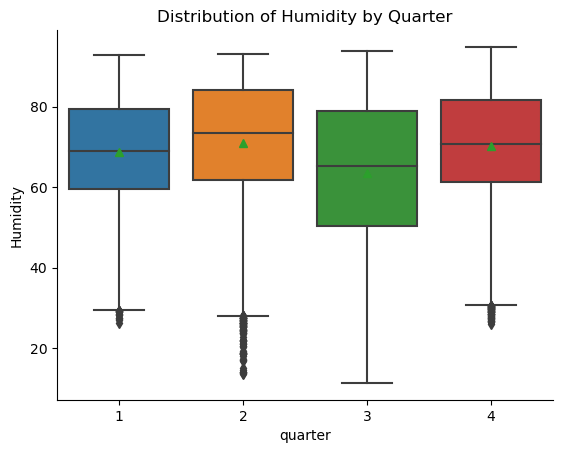

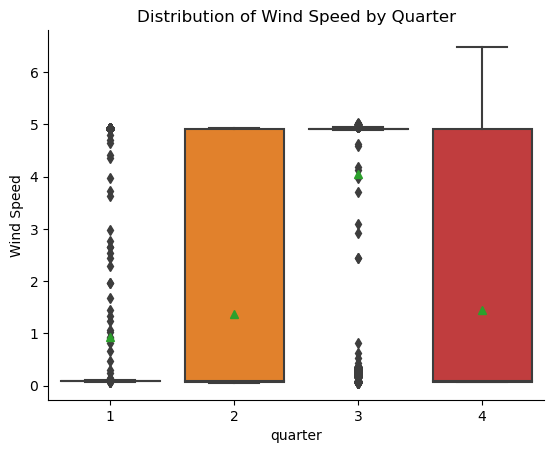

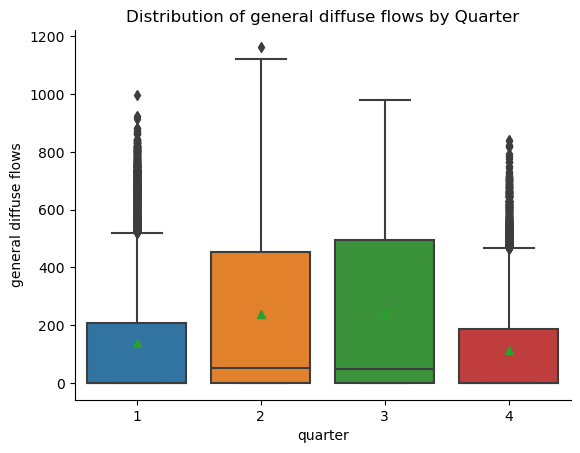

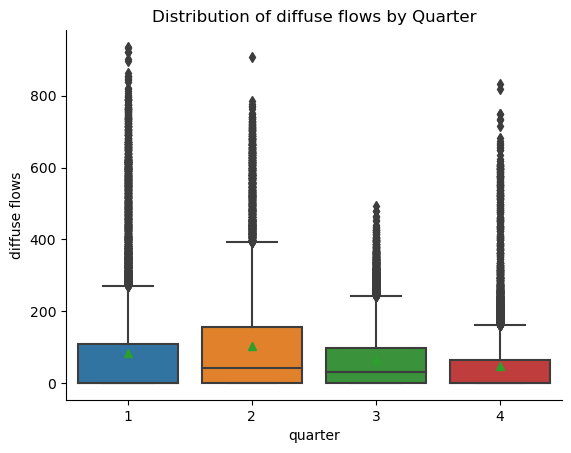

In [147]:
Data_agg_quarter['quarter'] = Data_agg_quarter['DateTime'].dt.quarter

#distributions by quarter
def visualize_features_by_quarter(df, features):
      for feature in features:
        sns.boxplot(
            x = "quarter",
            y = feature,
            showmeans=True,
            data=df
        )
        sns.despine()
        plt.title(f"Distribution of {feature} by Quarter")
        plt.show()


features_to_visualize = ['Temperature', 'Humidity' , 'Wind Speed', 'general diffuse flows' , 'diffuse flows']

visualize_features_by_quarter(Data_agg_quarter.copy(), features_to_visualize)

### Temperature effect

In [148]:
# Rename columns to remove extra spaces
Data_agg_quarter.rename(columns={'Zone 2  Power Consumption': 'Zone 2 Power Consumption',
                                  'Zone 3  Power Consumption': 'Zone 3 Power Consumption'}, inplace=True)


Correlation between Zone 1 Power Consumption and Temperature: 0.9070465337585452


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


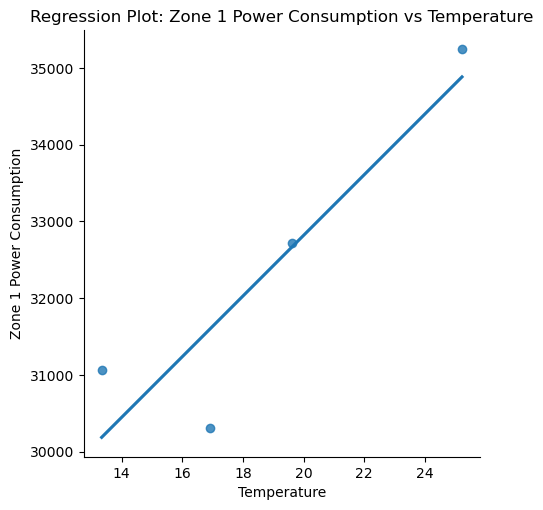

Correlation between Zone 2 Power Consumption and Temperature: 0.6076503600542322


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


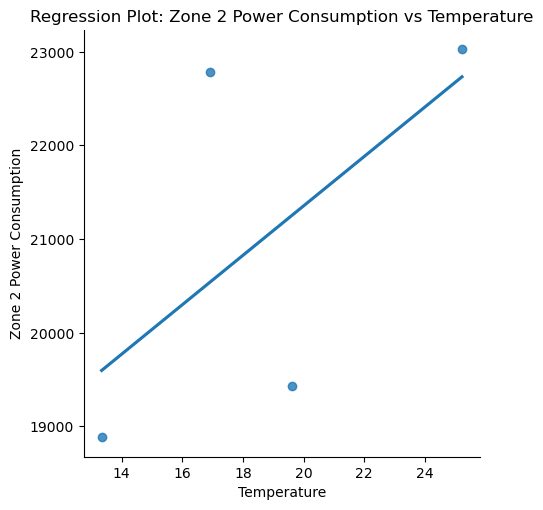

Correlation between Zone 3 Power Consumption and Temperature: 0.7026945232687414


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


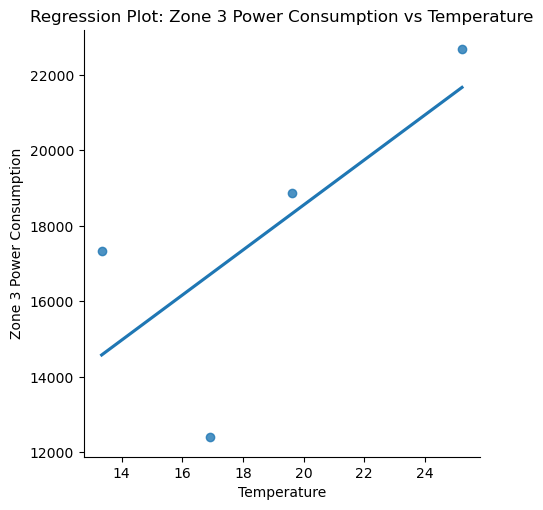

In [149]:
grouped_data = Data_agg_quarter.groupby('quarter')

average_data = grouped_data.agg({
    'Temperature': 'mean',
    'Zone 1 Power Consumption': 'mean',
    'Zone 2 Power Consumption': 'mean',
    'Zone 3 Power Consumption': 'mean'
}).reset_index()

zones_consumption = ['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']

for zone in zones_consumption:
    correlation = average_data[[zone, 'Temperature']].corr().iloc[0, 1]
    print(f"Correlation between {zone} and Temperature: {correlation}")

    sns.lmplot(x='Temperature', y=zone, data=average_data, ci=None)
    plt.title(f'Regression Plot: {zone} vs Temperature')
    plt.xlabel('Temperature')
    plt.ylabel(zone)
    plt.show()


Correlation between Zone 1 Power Consumption and Temperature: 0.9070465337585452


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


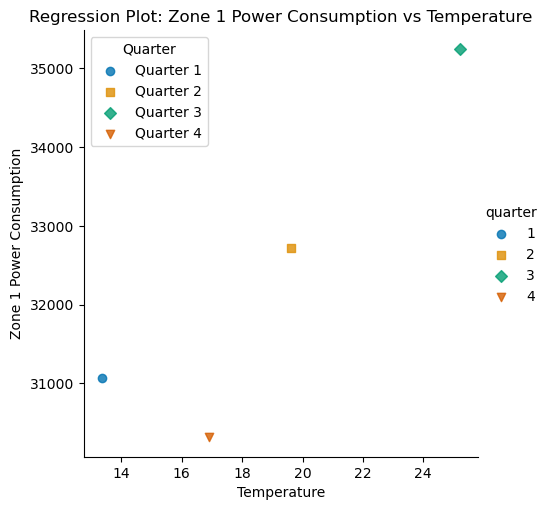

Correlation between Zone 2 Power Consumption and Temperature: 0.6076503600542322


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


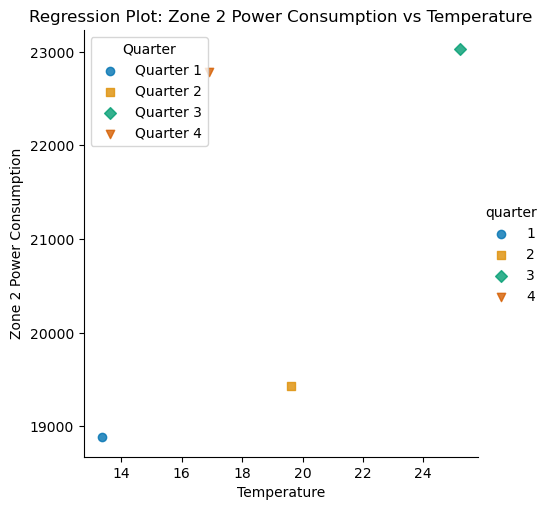

Correlation between Zone 3 Power Consumption and Temperature: 0.7026945232687414


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


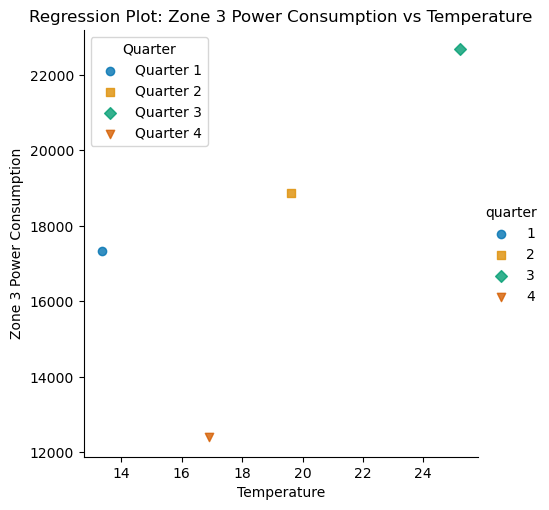

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = Data_agg_quarter.groupby('quarter')
average_data = grouped_data.agg({
    'Temperature': 'mean',
    'Zone 1 Power Consumption': 'mean',
    'Zone 2 Power Consumption': 'mean',
    'Zone 3 Power Consumption': 'mean'
}).reset_index()

zones_consumption = ['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']
unique_quarters = average_data['quarter'].unique()

markers = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'h', 'H', 'd']

for zone in zones_consumption:

    correlation = average_data[[zone, 'Temperature']].corr().iloc[0, 1]
    print(f"Correlation between {zone} and Temperature: {correlation}")

    # Plotting the regression plot with hue set to quarter
    sns.lmplot(x='Temperature', y=zone, hue='quarter', data=average_data, ci=None, palette='colorblind', markers=markers[:len(unique_quarters)])
    plt.title(f'Regression Plot: {zone} vs Temperature')
    plt.xlabel('Temperature')
    plt.ylabel(zone)
    
    # Adding legend with quarter labels
    plt.legend(title='Quarter', labels=[f'Quarter {q}' for q in unique_quarters])
    
    plt.show()


# **Desicion tree Algorithm**

No need to scale the data because decision trees are not sensitive to transformations  

In [151]:
Data_agg_quarter

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,quarter
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1
...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,4
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,4
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,4
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,4


In [ ]:
Data_agg_quarter['isweekend'] = Data_agg_quarter['DateTime'].dt.dayofweek.isin([4, 5])
Data_agg_quarter

In [179]:
import pandas as pd

X = Data_agg_quarter[['Temperature', 'Humidity', 'Wind Speed' , 'general diffuse flows' , 'diffuse flows' ,'quarter' , 'isweekend']]  
y = Data_agg_quarter[['Zone 1 Power Consumption' , 'Zone 2 Power Consumption' , 'Zone 3 Power Consumption']]  # Target variables for each zone


In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
y_test

,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
15506,32985.14532,19396.74134,17623.27273
51943,34737.64259,29803.00706,14417.28691
212,27894.68354,20808.51064,16458.79518
11210,42476.93617,23634.14634,25089.67742
16307,21341.14101,12006.10998,11531.63636
...,...,...,...
9830,22169.87234,13368.29268,13081.93548
43422,30759.91247,22563.48548,11905.16717
17841,43473.83607,26102.78638,25465.26316
38030,27347.25664,14792.93139,12473.13585


In [182]:
# Assuming y_train and y_test are DataFrames with columns 'zone1_power', 'zone2_power', 'zone3_power'
y_train_zone1 = y_train['Zone 1 Power Consumption']
y_test_zone1 = y_test['Zone 1 Power Consumption']

y_train_zone2 = y_train['Zone 2 Power Consumption']
y_test_zone2 = y_test['Zone 2 Power Consumption']

y_train_zone3 = y_train['Zone 3 Power Consumption']
y_test_zone3 = y_test['Zone 3 Power Consumption']

In [183]:
y_test_zone1

15506    32985.14532
51943    34737.64259
212      27894.68354
11210    42476.93617
16307    21341.14101
            ...     
9830     22169.87234
43422    30759.91247
17841    43473.83607
38030    27347.25664
31020    37641.37625
Name: Zone 1 Power Consumption, Length: 10484, dtype: float64

In [184]:
from sklearn.tree import DecisionTreeRegressor

In [185]:
dtree_zone1 = DecisionTreeRegressor()
dtree_zone2 = DecisionTreeRegressor()
dtree_zone3 = DecisionTreeRegressor()

# Training the decision tree models for each zone
dtree_zone1.fit(X_train, y_train_zone1 )
dtree_zone2.fit(X_train, y_train_zone2 )
dtree_zone3.fit(X_train, y_train_zone3 )

# Applying the trained decision tree models to make predictions on the test data
y_pred_zone1 = dtree_zone1.predict(X_test)
y_pred_zone2 = dtree_zone2.predict(X_test)
y_pred_zone3 = dtree_zone3.predict(X_test)

In [186]:
y_pred_zone1

array([32947.94403, 21633.46008, 28635.94937, ..., 45658.38536,
       30316.46018, 37283.37403])

In [187]:
y_test_zone1

15506    32985.14532
51943    34737.64259
212      27894.68354
11210    42476.93617
16307    21341.14101
            ...     
9830     22169.87234
43422    30759.91247
17841    43473.83607
38030    27347.25664
31020    37641.37625
Name: Zone 1 Power Consumption, Length: 10484, dtype: float64

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_dtree(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Evaluate models for each zone
evaluation_zone1 = evaluate_dtree(y_test_zone1, y_pred_zone1)
evaluation_zone2 = evaluate_dtree(y_test_zone2, y_pred_zone2)
evaluation_zone3 = evaluate_dtree(y_test_zone3, y_pred_zone3)

# Print evaluation results
print("Evaluation for Zone 1:", evaluation_zone1)
print("Evaluation for Zone 2:", evaluation_zone2)
print("Evaluation for Zone 3:", evaluation_zone3)

Evaluation for Zone 1: {'MAE': 3121.3066784013736, 'MSE': 31060351.456605162, 'RMSE': 5573.181448383424}
Evaluation for Zone 2: {'MAE': 2252.991295263449, 'MSE': 15957254.885246774, 'RMSE': 3994.653287238678}
Evaluation for Zone 3: {'MAE': 2071.1581056805608, 'MSE': 13785044.70335993, 'RMSE': 3712.821663285207}


In [189]:
n = len(y_test_zone1)

In [190]:
MPE1 = (1/n) * sum(abs((y_test_zone1 - y_pred_zone1) / y_test_zone1)) * 100
MPE2 = (1/n) * sum(abs((y_test_zone2 - y_pred_zone2) / y_test_zone2)) * 100
MPE3 = (1/n) * sum(abs((y_test_zone3 - y_pred_zone3) / y_test_zone3)) * 100

In [191]:
print("Mean Percentage Error for Zone 1:", MPE1)
print("Mean Percentage Error for Zone 2:", MPE2)
print("Mean Percentage Error for Zone 3:", MPE3)

Mean Percentage Error for Zone 1: 10.123937811723094
Mean Percentage Error for Zone 2: 11.23512979088066
Mean Percentage Error for Zone 3: 12.273304842848434


In [192]:
from sklearn.metrics import r2_score

r2_zone1 = r2_score(y_test_zone1, y_pred_zone1)
print(f"R^2 Score for Zone 1: {r2_zone1:.4f}")

r2_zone2 = r2_score(y_test_zone2, y_pred_zone2)
print(f"R^2 Score for Zone 2: {r2_zone2:.4f}")

r2_zone3 = r2_score(y_test_zone3, y_pred_zone3)
print(f"R^2 Score for Zone 3: {r2_zone3:.4f}")


R^2 Score for Zone 1: 0.3849
R^2 Score for Zone 2: 0.4088
R^2 Score for Zone 3: 0.6839


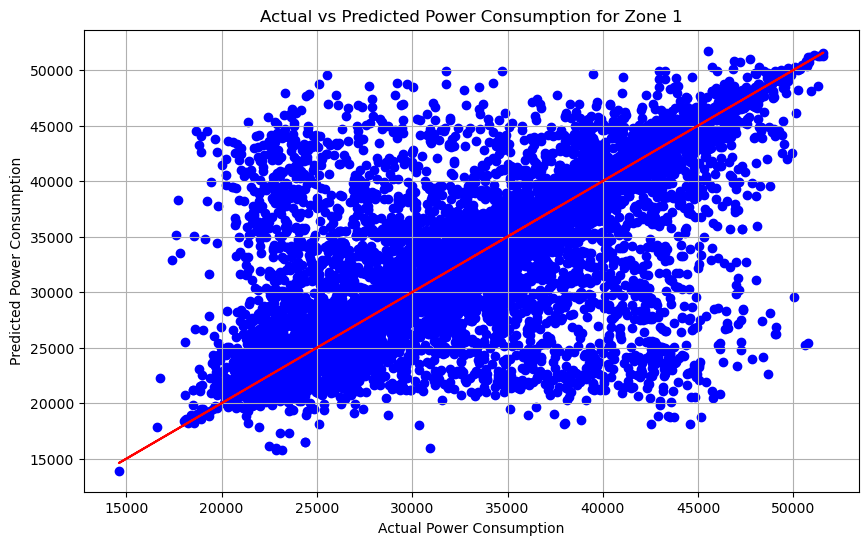

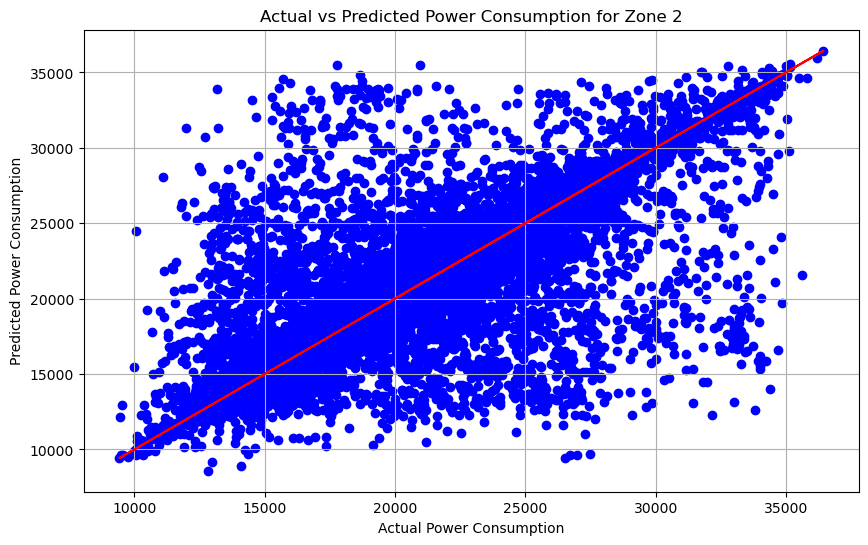

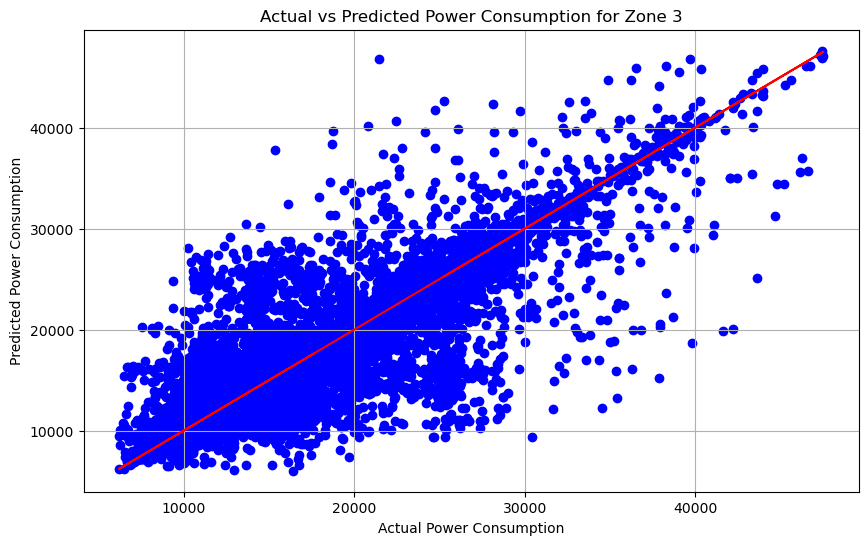

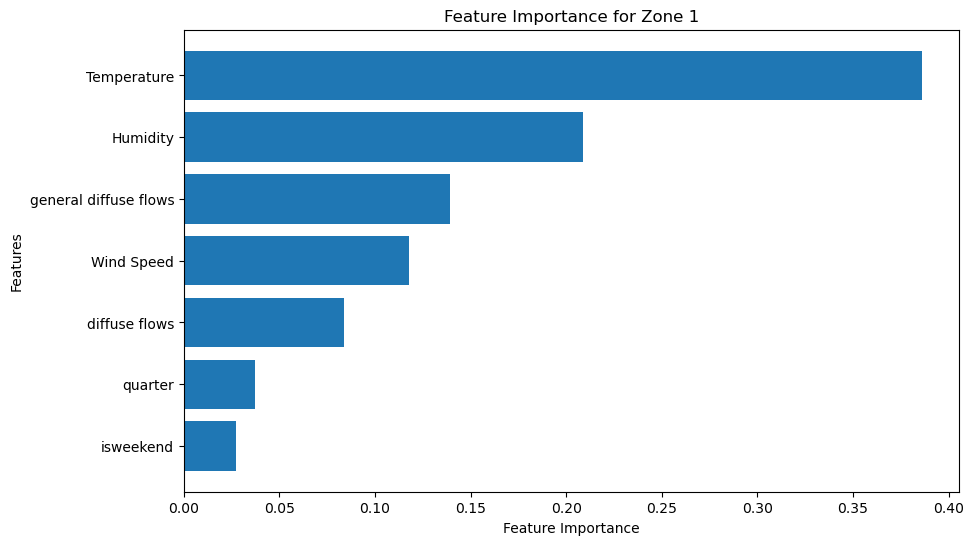

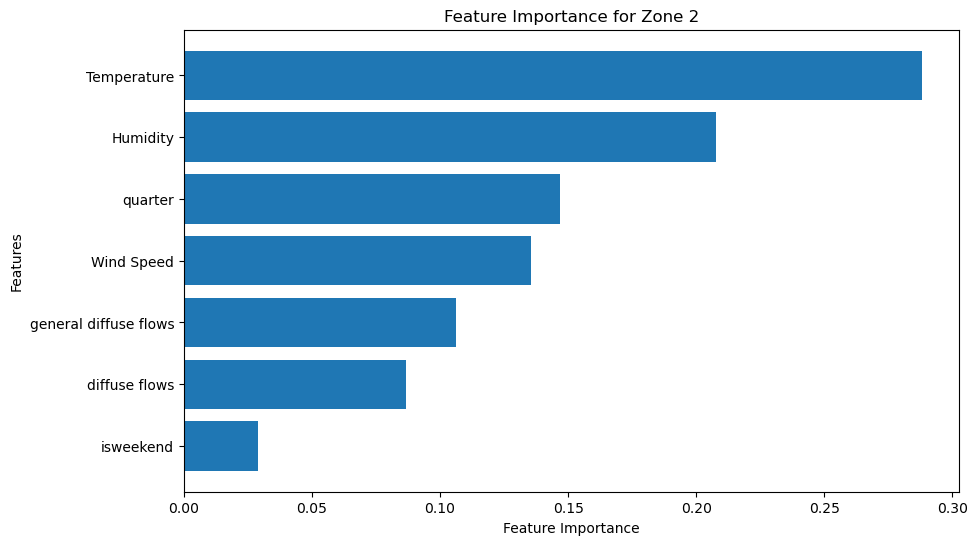

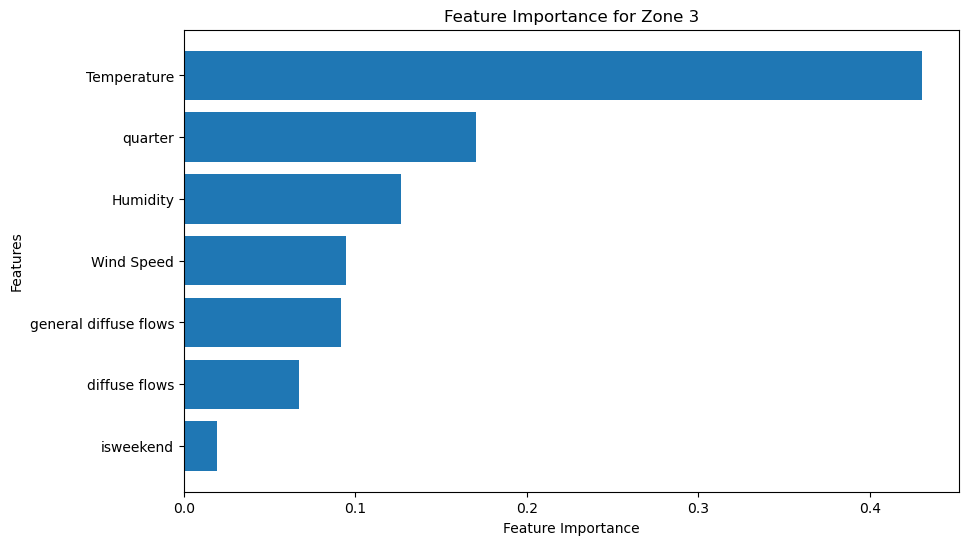

In [193]:

# Visualization
def plot_predictions(y_true, y_pred, zone_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue')
    plt.plot(y_true, y_true, color='red')
    plt.xlabel('Actual Power Consumption')
    plt.ylabel('Predicted Power Consumption')
    plt.title(f'Actual vs Predicted Power Consumption for {zone_name}')
    plt.grid(True)
    plt.show()

# Plot predictions for each zone
plot_predictions(y_test['Zone 1 Power Consumption'], y_pred_zone1, 'Zone 1')
plot_predictions(y_test['Zone 2 Power Consumption'], y_pred_zone2, 'Zone 2')
plot_predictions(y_test['Zone 3 Power Consumption'], y_pred_zone3, 'Zone 3')

# Feature Importance Analysis
def plot_feature_importance(model, feature_names, zone_name):
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance for {zone_name}')
    plt.show()

# Plot feature importance for each zone
plot_feature_importance(dtree_zone1, X_train.columns, 'Zone 1')
plot_feature_importance(dtree_zone2, X_train.columns, 'Zone 2')
plot_feature_importance(dtree_zone3, X_train.columns, 'Zone 3')

## Hyperparameter Tuning :

In [ ]:
X = Data_agg_quarter[['Temperature', 'Humidity', 'Wind Speed' , 'general diffuse flows' , 'diffuse flows' ,'quarter' ,'isweekend']]  
y = Data_agg_quarter[['Zone 1 Power Consumption' , 'Zone 2 Power Consumption' , 'Zone 3 Power Consumption']]  # Target variables for each zone

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_zone1 = y_train['Zone 1 Power Consumption']
y_test_zone1 = y_test['Zone 1 Power Consumption']

y_train_zone2 = y_train['Zone 2 Power Consumption']
y_test_zone2 = y_test['Zone 2 Power Consumption']

y_train_zone3 = y_train['Zone 3 Power Consumption']
y_test_zone3 = y_test['Zone 3 Power Consumption']

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a function to perform grid search and return the best model
def perform_grid_search(X_train, y_train, X_test, y_test, param_grid):
    dtree = DecisionTreeRegressor()
    grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return best_model, r2

# Perform grid search for zone 1
best_model_zone1, r2_zone1 = perform_grid_search(X_train, y_train_zone1, X_test, y_test_zone1, param_grid)
print(f"Best Model for Zone 1: {best_model_zone1}")
print(f"R^2 Score for Zone 1: {r2_zone1:.4f}")

# Perform grid search for zone 2
best_model_zone2, r2_zone2 = perform_grid_search(X_train, y_train_zone2, X_test, y_test_zone2, param_grid)
print(f"Best Model for Zone 2: {best_model_zone2}")
print(f"R^2 Score for Zone 2: {r2_zone2:.4f}")

# Perform grid search for zone 3
best_model_zone3, r2_zone3 = perform_grid_search(X_train, y_train_zone3, X_test, y_test_zone3, param_grid)
print(f"Best Model for Zone 3: {best_model_zone3}")
print(f"R^2 Score for Zone 3: {r2_zone3:.4f}")


Best Model for Zone 1: DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)
R^2 Score for Zone 1: 0.4951
Best Model for Zone 2: DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)
R^2 Score for Zone 2: 0.5330
Best Model for Zone 3: DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)
R^2 Score for Zone 3: 0.7297


# **Random Forest**

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
rf_zone1 = RandomForestRegressor()
rf_zone2 = RandomForestRegressor()
rf_zone3 = RandomForestRegressor()


rf_zone1.fit(X_train, y_train_zone1 )
rf_zone2.fit(X_train, y_train_zone2 )
rf_zone3.fit(X_train, y_train_zone3 )


y_pred_zone1_rf = rf_zone1.predict(X_test)
y_pred_zone2_rf = rf_zone2.predict(X_test)
y_pred_zone3_rf = rf_zone3.predict(X_test)

In [197]:

# Evaluate models for each zone
evaluation_zone1 = evaluate_dtree(y_test_zone1, y_pred_zone1_rf)
evaluation_zone2 = evaluate_dtree(y_test_zone2, y_pred_zone2_rf)
evaluation_zone3 = evaluate_dtree(y_test_zone3, y_pred_zone3_rf)

# Print evaluation results
print("Evaluation for Zone 1:", evaluation_zone1)
print("Evaluation for Zone 2:", evaluation_zone2)
print("Evaluation for Zone 3:", evaluation_zone3)

Evaluation for Zone 1: {'MAE': 2664.4728363081836, 'MSE': 15928834.43877874, 'RMSE': 3991.094391113638}
Evaluation for Zone 2: {'MAE': 1875.7742953036188, 'MSE': 7776184.445901915, 'RMSE': 2788.5810811059296}
Evaluation for Zone 3: {'MAE': 1737.357000960496, 'MSE': 7024250.551183841, 'RMSE': 2650.330272095129}


In [198]:
MPE1 = (1/n) * sum(abs((y_test_zone1 - y_pred_zone1_rf) / y_test_zone1)) * 100
MPE2 = (1/n) * sum(abs((y_test_zone2 - y_pred_zone2_rf) / y_test_zone2)) * 100
MPE3 = (1/n) * sum(abs((y_test_zone3 - y_pred_zone3_rf) / y_test_zone3)) * 100

In [199]:
print("Mean Percentage Error for Zone 1:", MPE1)
print("Mean Percentage Error for Zone 2:", MPE2)
print("Mean Percentage Error for Zone 3:", MPE3)

Mean Percentage Error for Zone 1: 8.672440934278457
Mean Percentage Error for Zone 2: 9.497557986165765
Mean Percentage Error for Zone 3: 10.369125525998939


In [200]:
r2_zone1 = r2_score(y_test_zone1, y_pred_zone1_rf)
print(f"R^2 Score for Zone 1: {r2_zone1:.4f}")

r2_zone2 = r2_score(y_test_zone2, y_pred_zone2_rf)
print(f"R^2 Score for Zone 2: {r2_zone2:.4f}")

r2_zone3 = r2_score(y_test_zone3, y_pred_zone3_rf)
print(f"R^2 Score for Zone 3: {r2_zone3:.4f}")

R^2 Score for Zone 1: 0.6845
R^2 Score for Zone 2: 0.7119
R^2 Score for Zone 3: 0.8389


# Enhance random forest

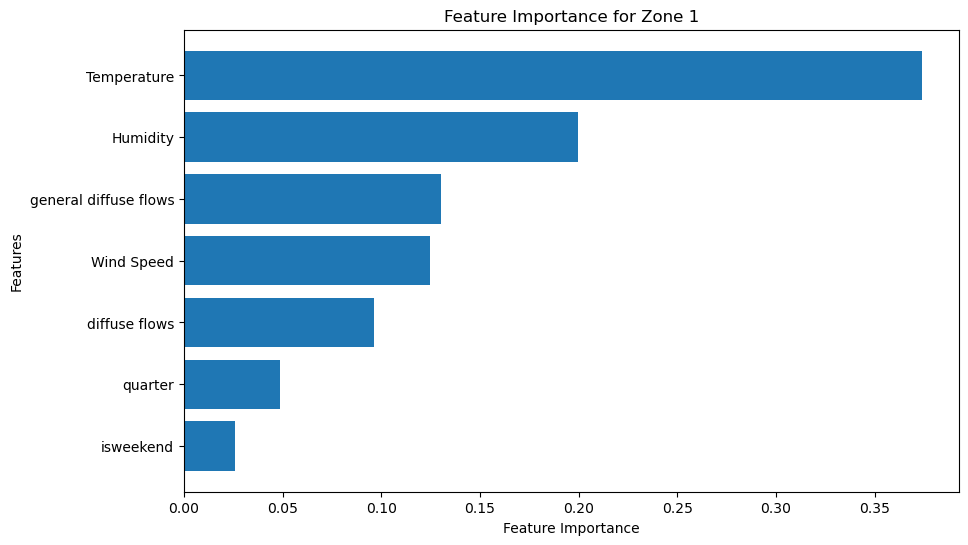

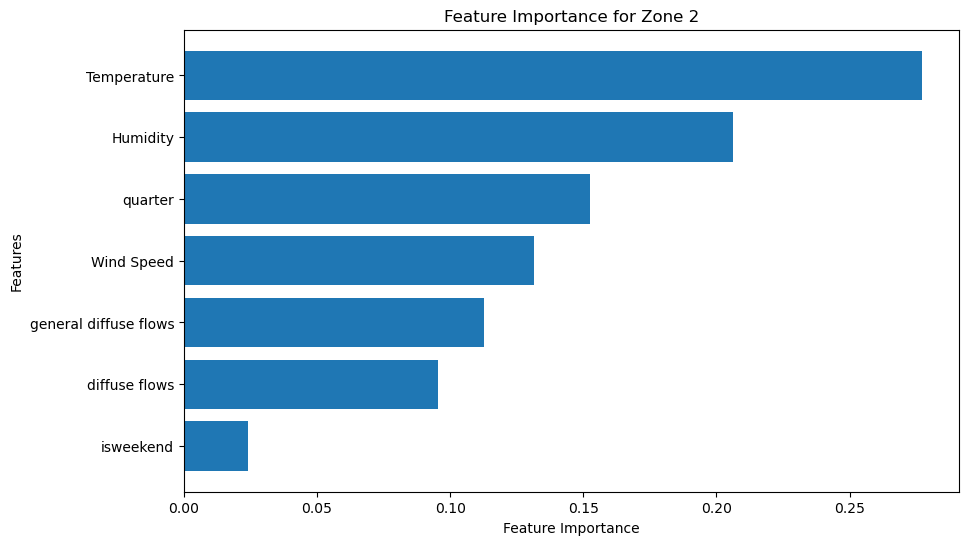

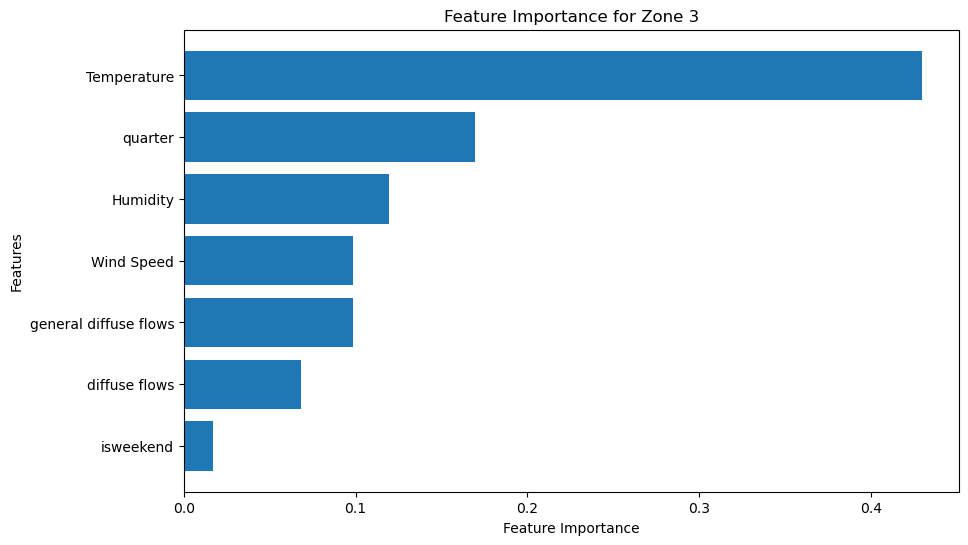

In [201]:
plot_feature_importance(rf_zone1, X_train.columns, 'Zone 1')
plot_feature_importance(rf_zone2, X_train.columns, 'Zone 2')
plot_feature_importance(rf_zone3, X_train.columns, 'Zone 3')

In [220]:
import pandas as pd

Data_agg_quarter['hour'] = Data_agg_quarter['DateTime'].dt.hour

# Create a new column 'time_range' based on the hour
def get_time_range(hour):
    if 8 <= hour < 20:
        return 1
    else:
        return 0

Data_agg_quarter['time_range'] = Data_agg_quarter['hour'].apply(get_time_range)

# Drop the 'hour' column as it's no longer needed
Data_agg_quarter = Data_agg_quarter.drop(columns=['hour'])

In [221]:
Data_agg_quarter

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,quarter,isweekend,time_range
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,False,0
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,False,0
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,False,0
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,False,0
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,4,True,0
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,4,True,0
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,4,True,0
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,4,True,0


In [226]:
X = Data_agg_quarter[['Temperature', 'Humidity', 'time_range', 'Wind Speed' , 'general diffuse flows' ,'quarter']]  
y = Data_agg_quarter[['Zone 1 Power Consumption' , 'Zone 2 Power Consumption' , 'Zone 3 Power Consumption']]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_zone1 = y_train['Zone 1 Power Consumption']
y_test_zone1 = y_test['Zone 1 Power Consumption']

y_train_zone2 = y_train['Zone 2 Power Consumption']
y_test_zone2 = y_test['Zone 2 Power Consumption']

y_train_zone3 = y_train['Zone 3 Power Consumption']
y_test_zone3 = y_test['Zone 3 Power Consumption']

In [227]:
rf_zone1 = RandomForestRegressor()
rf_zone2 = RandomForestRegressor()
rf_zone3 = RandomForestRegressor()


rf_zone1.fit(X_train, y_train_zone1 )
rf_zone2.fit(X_train, y_train_zone2 )
rf_zone3.fit(X_train, y_train_zone3 )


y_pred_zone1_rf = rf_zone1.predict(X_test)
y_pred_zone2_rf = rf_zone2.predict(X_test)
y_pred_zone3_rf = rf_zone3.predict(X_test)

In [228]:
r2_zone1 = r2_score(y_test_zone1, y_pred_zone1_rf)
print(f"R^2 Score for Zone 1: {r2_zone1:.4f}")

r2_zone2 = r2_score(y_test_zone2, y_pred_zone2_rf)
print(f"R^2 Score for Zone 2: {r2_zone2:.4f}")

r2_zone3 = r2_score(y_test_zone3, y_pred_zone3_rf)
print(f"R^2 Score for Zone 3: {r2_zone3:.4f}")

R^2 Score for Zone 1: 0.6937
R^2 Score for Zone 2: 0.7209
R^2 Score for Zone 3: 0.8341


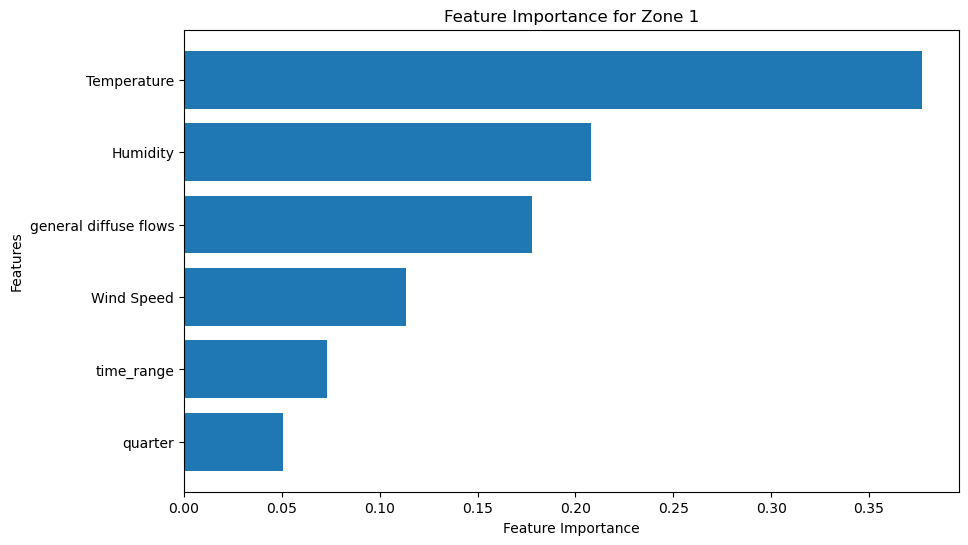

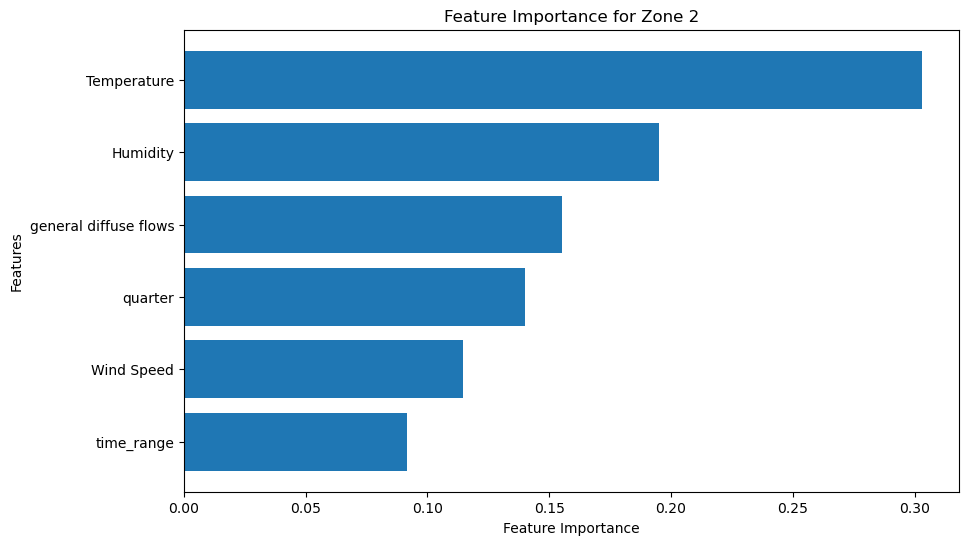

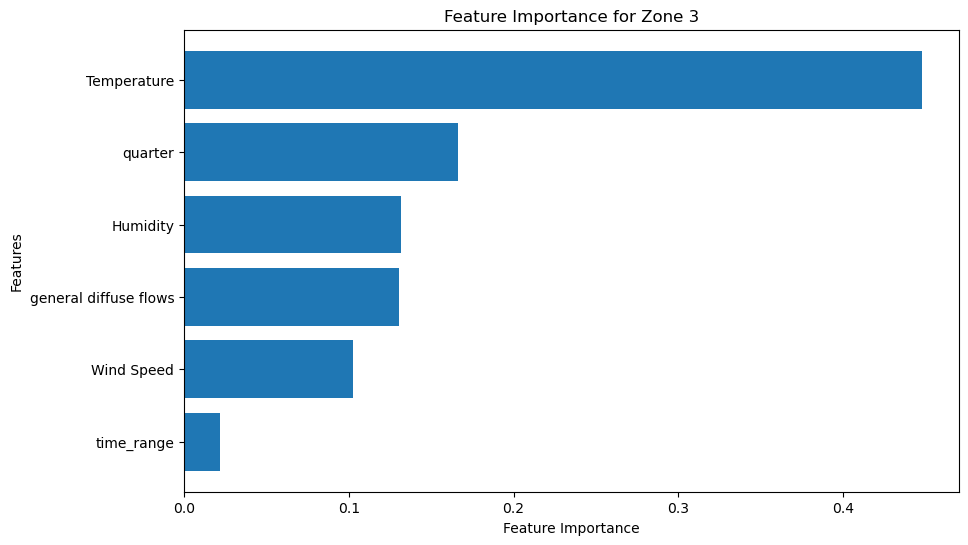

In [229]:
plot_feature_importance(rf_zone1, X_train.columns, 'Zone 1')
plot_feature_importance(rf_zone2, X_train.columns, 'Zone 2')
plot_feature_importance(rf_zone3, X_train.columns, 'Zone 3')

In [230]:
Data_agg_quarter['Month'] = Data_agg_quarter['DateTime'].dt.month
Data_agg_quarter['Hour'] = Data_agg_quarter['DateTime'].dt.hour
Data_agg_quarter

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,quarter,isweekend,time_range,Month,Hour
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,False,0,1,0
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,False,0,1,0
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,False,0,1,0
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,False,0,1,0
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,4,True,0,12,23
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,4,True,0,12,23
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,4,True,0,12,23
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,4,True,0,12,23


In [234]:
X = Data_agg_quarter[['Temperature', 'Humidity', 'time_range', 'Wind Speed', 'general diffuse flows' ,'diffuse flows', 'quarter', 'isweekend', 'Month', 'Hour']]
y = Data_agg_quarter[['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract y_train and y_test for each zone
y_train_zone1 = y_train['Zone 1 Power Consumption']
y_test_zone1 = y_test['Zone 1 Power Consumption']

y_train_zone2 = y_train['Zone 2 Power Consumption']
y_test_zone2 = y_test['Zone 2 Power Consumption']

y_train_zone3 = y_train['Zone 3 Power Consumption']
y_test_zone3 = y_test['Zone 3 Power Consumption']

# Define the parameter grid
param_grid = {
    'n_estimators':[5,10,15,20],
    'max_depth': [None, 10, 20, 22],
    'min_samples_leaf': [1, 5, 10, 25],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search_zone1 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search_zone2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search_zone3 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the models
grid_search_zone1.fit(X_train, y_train_zone1)
grid_search_zone2.fit(X_train, y_train_zone2)
grid_search_zone3.fit(X_train, y_train_zone3)

# Print best parameters and best scores for each zone
print("Zone 1 - Best parameters:", grid_search_zone1.best_params_)
print("Zone 1 - Best score:", grid_search_zone1.best_score_)
print("Zone 2 - Best parameters:", grid_search_zone2.best_params_)
print("Zone 2 - Best score:", grid_search_zone2.best_score_)
print("Zone 3 - Best parameters:", grid_search_zone3.best_params_)
print("Zone 3 - Best score:", grid_search_zone3.best_score_)

# Optionally, you can also check the performance on the test set
y_pred_zone1 = grid_search_zone1.predict(X_test)
y_pred_zone2 = grid_search_zone2.predict(X_test)
y_pred_zone3 = grid_search_zone3.predict(X_test)

mse_zone1 = mean_squared_error(y_test_zone1, y_pred_zone1)
mse_zone2 = mean_squared_error(y_test_zone2, y_pred_zone2)
mse_zone3 = mean_squared_error(y_test_zone3, y_pred_zone3)

print("Zone 1 - Mean Squared Error on test set:", mse_zone1)
print("Zone 2 - Mean Squared Error on test set:", mse_zone2)
print("Zone 3 - Mean Squared Error on test set:", mse_zone3)



Zone 1 - Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 20}
Zone 1 - Best score: 0.9637764273888294
Zone 2 - Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 20}
Zone 2 - Best score: 0.9526422779141468
Zone 3 - Best parameters: {'max_depth': 22, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 20}
Zone 3 - Best score: 0.9808163399812708
Zone 1 - Mean Squared Error on test set: 1608001.4085547975
Zone 2 - Mean Squared Error on test set: 1111297.4222113302
Zone 3 - Mean Squared Error on test set: 751478.2358142425


# Naive bayes

Naive Bayes is a probabilistic algorithm that is commonly used for classification problems. However, it is not a suitable algorithm for regression problems as it can only provide discrete output values. Since we want to use Naive Bayes for regression, we can use Gaussian Naive Bayes.

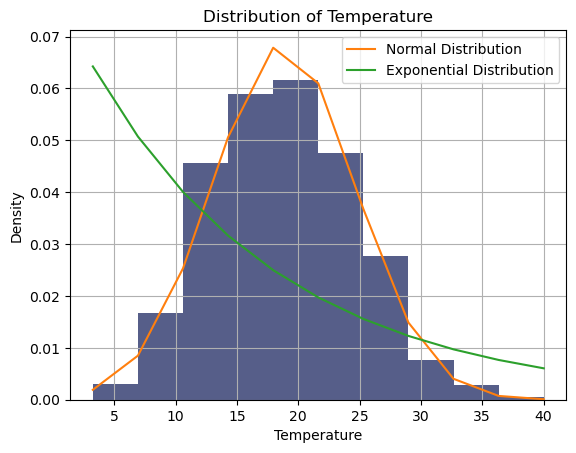

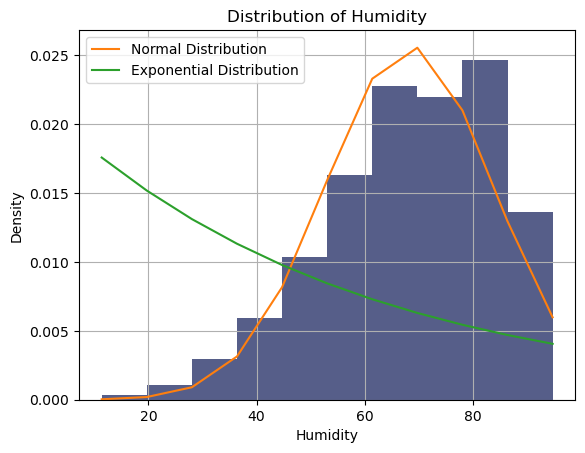

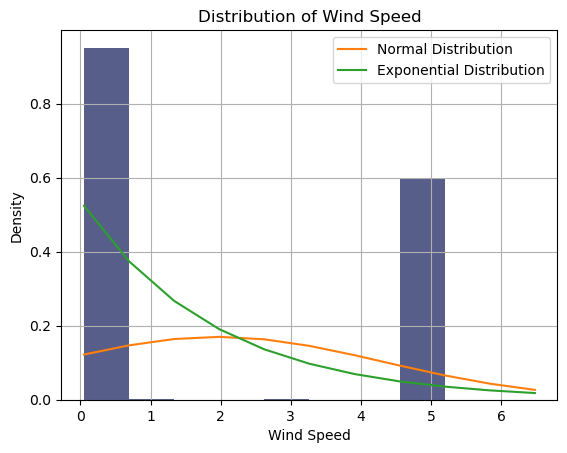

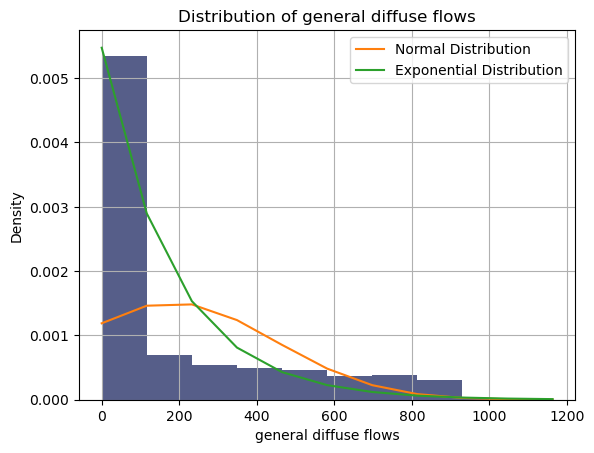

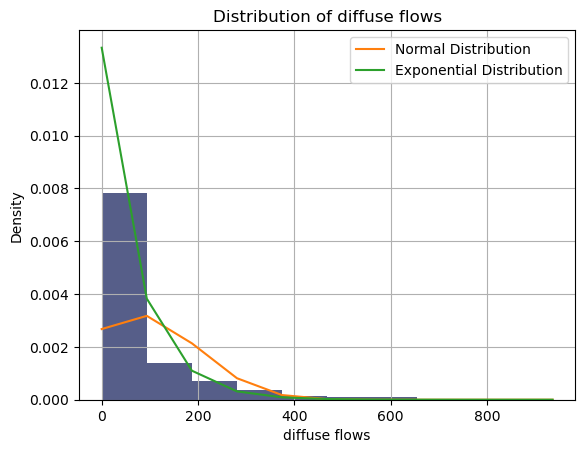

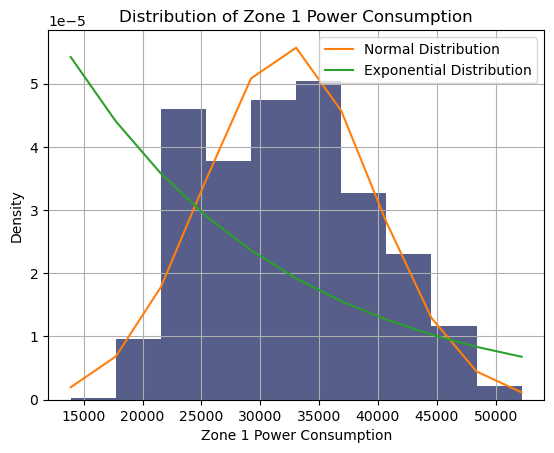

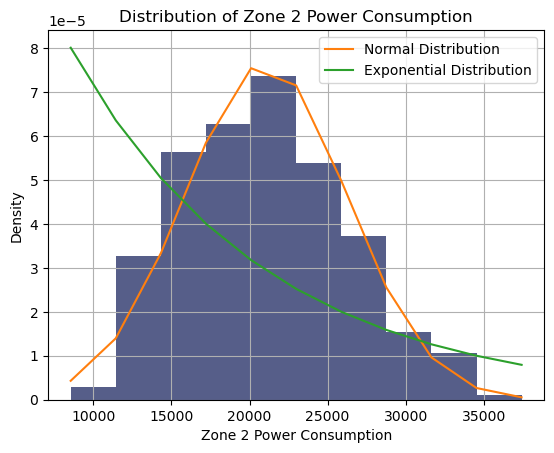

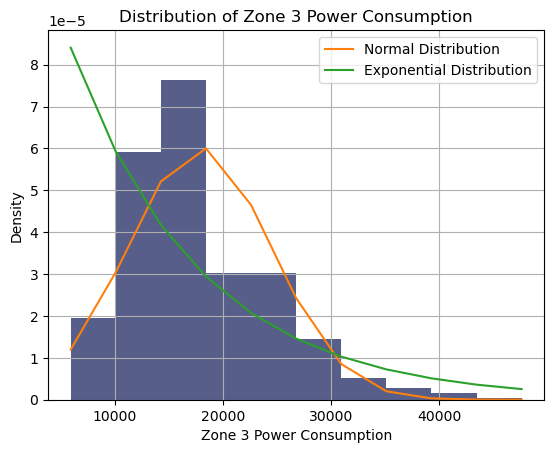

In [39]:
dataset = Data_agg_quarter[['Temperature', 'Humidity' , 'Wind Speed' , 'general diffuse flows' , 'diffuse flows', 'Zone 1 Power Consumption' ,'Zone 2 Power Consumption','Zone 3 Power Consumption']]

def plot_distribution(feature_name ):
    # Extract the feature data
    feature_data = dataset[feature_name]

    # Try fitting a normal distribution
    norm_params = stats.norm.fit(feature_data)
    norm_dist = stats.norm(*norm_params)

    # Try fitting an exponential distribution
    exp_params = stats.expon.fit(feature_data)
    exp_dist = stats.expon(*exp_params)

    # Generate bins for the histogram
    bins = plt.hist(feature_data, density=True)[1]

    # Plot the histogram
    plt.plot(bins, norm_dist.pdf(bins), label='Normal Distribution')
    plt.plot(bins, exp_dist.pdf(bins), label='Exponential Distribution')
    plt.hist(feature_data, density=True, alpha=0.3)  # Semi-transparent histogram

    # Set labels and title
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the distribution for each feature
    
for feature_name in dataset.columns:
            plot_distribution(feature_name)


In [40]:
Data_agg_quarter.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,quarter
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1


## 1. Discretize the Target Variable

- Since Naive Bayes is fundamentally a classification algorithm, wz can transform this  regression problem into a classification problem by discretizing the target variable (power consumption). This involves converting the continuous target values into discrete classes

- Sturges' formula is a simple heuristic to determine the number of bins (k) for a histogram or to discretize a continuous variable. It is based on the assumption that the data is normally distributed and is defined as:

**k=⌈log2(n)+1⌉**


In [41]:
num_bins_zone1 = int(np.ceil(np.log2(Data_agg_quarter['Zone 1 Power Consumption'].nunique()) + 1))
num_bins_zone2 = int(np.ceil(np.log2(Data_agg_quarter['Zone 2 Power Consumption'].nunique()) + 1))
num_bins_zone3 = int(np.ceil(np.log2(Data_agg_quarter['Zone 3 Power Consumption'].nunique()) + 1))

print(f"zone1 bins: {num_bins_zone1}")
print(f"zone2 bins: {num_bins_zone2}")
print(f"zone3 bins: {num_bins_zone3}")

zone1 bins: 16
zone2 bins: 16
zone3 bins: 16


- Using equal-width bins  would be a suitable choice. This method works well for normally distributed data because the data is evenly spread across the range, and equal-width bins will reflect this distribution accurately.

In [42]:
# Create equal-width bins
Data_agg_quarter['binned_target zone 1'] = pd.cut(Data_agg_quarter['Zone 1 Power Consumption'], bins=num_bins_zone1, labels=False)

# Display the result
print(Data_agg_quarter[['Zone 1 Power Consumption', 'binned_target zone 1']])

       Zone 1 Power Consumption  binned_target zone 1
0                   34055.69620                     8
1                   29814.68354                     6
2                   29128.10127                     6
3                   28228.86076                     5
4                   27335.69620                     5
...                         ...                   ...
52411               31160.45627                     7
52412               30430.41825                     6
52413               29590.87452                     6
52414               28958.17490                     6
52415               28349.80989                     6

[52416 rows x 2 columns]


In [43]:
bin_ranges = Data_agg_quarter.groupby('binned_target zone 1')['Zone 1 Power Consumption'].describe()

# Display range of values for each bin
print("\nRange of values for each bin:")
print(bin_ranges[['min', 'max']])


Range of values for each bin:
                              min          max
binned_target zone 1                          
0                     13895.69620  16216.70886
1                     16368.60759  18683.80328
2                     18688.97338  21075.25424
3                     21079.14894  23472.31788
4                     23474.01507  25865.78073
5                     25867.29817  28260.76596
6                     28262.99667  30655.51331
7                     30656.21262  33049.18033
8                     33052.30769  35443.70861
9                     35445.66372  37835.04425
10                    37838.67110  40230.99338
11                    40233.84615  42626.52079
12                    42627.81457  45021.12957
13                    45022.42623  47415.09934
14                    47416.01751  49807.05882
15                    49813.45172  52204.39512


In [44]:
Data_agg_quarter['binned_target zone 2'] = pd.cut(Data_agg_quarter['Zone 2 Power Consumption'], bins=num_bins_zone2, labels=False)
Data_agg_quarter['binned_target zone 3'] = pd.cut(Data_agg_quarter['Zone 3 Power Consumption'], bins=num_bins_zone3, labels=False)

In [45]:
n = len(Data_agg_quarter['Wind Speed'])

# Sturges' Formula
sturges_bins = int(np.ceil(np.log2(Data_agg_quarter['Wind Speed'].nunique()) + 1))

# Rice Rule
rice_bins = int(np.ceil(2 * n**(1/3)))

# Freedman-Diaconis Rule
iqr = np.percentile(Data_agg_quarter['Wind Speed'], 75) - np.percentile(Data_agg_quarter['Wind Speed'], 25)
bin_width_fd = 2 * iqr * n**(-1/3)
fd_bins = int(np.ceil((Data_agg_quarter['Wind Speed'].max() - Data_agg_quarter['Wind Speed'].min()) / bin_width_fd))

# Print the number of bins calculated by each method
print(f"Sturges' formula bins: {sturges_bins}")
print(f"Rice rule bins: {rice_bins}")
print(f"Freedman-Diaconis rule bins: {fd_bins}")


Sturges' formula bins: 11
Rice rule bins: 75
Freedman-Diaconis rule bins: 25


In [46]:
num_bins = 25
# Create equal-frequency bins
Data_agg_quarter['binned_wind_speed'] = pd.qcut(Data_agg_quarter['Wind Speed'], q=num_bins, labels=False)
# Display the result
print(Data_agg_quarter[['Wind Speed', 'binned_wind_speed']])


       Wind Speed  binned_wind_speed
0           0.083                  9
1           0.083                  9
2           0.080                  7
3           0.083                  9
4           0.081                  7
...           ...                ...
52411       0.080                  7
52412       0.082                  8
52413       0.086                 12
52414       0.080                  7
52415       0.081                  7

[52416 rows x 2 columns]


In [110]:
Data_agg_quarter.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,quarter,...,binned_target zone 2,binned_target zone 3,binned_wind_speed,binned_target 3 zone 1,binned_target 3 zone 2,binned_target 3 zone 3,Temperature binned,Humidity binned,general diffuse flows binned,diffuse flows binned
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,...,4,5,9,Mid,Low,High,0,2,0,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,...,5,5,9,Mid,Mid,High,0,3,1,0
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,...,5,5,7,Mid,Mid,High,0,3,1,0
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,...,5,4,9,Low,Mid,High,0,3,2,0
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,...,5,4,7,Low,Low,Mid,0,3,0,0


## 2. Apply Gaussian Naive Bayes

In [111]:
Data_NB = Data_agg_quarter[['Temperature' , 'Humidity', 'general diffuse flows', 'diffuse flows','quarter', 'binned_target zone 1' , 'binned_target zone 2' , 'binned_target zone 3','binned_wind_speed']]
Data_NB.head()

,Temperature,Humidity,general diffuse flows,diffuse flows,quarter,binned_target zone 1,binned_target zone 2,binned_target zone 3,binned_wind_speed
0,6.559,73.8,0.051,0.119,1,8,4,5,9
1,6.414,74.5,0.070,0.085,1,6,5,5,9
2,6.313,74.5,0.062,0.100,1,6,5,5,7
3,6.121,75.0,0.091,0.096,1,5,5,4,9
4,5.921,75.7,0.048,0.085,1,5,5,4,7


In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Separate features and targets
features = Data_NB[['Temperature', 'Humidity', 'general diffuse flows', 'diffuse flows', 'quarter', 'binned_wind_speed']]
target_zone_1 = Data_NB['binned_target zone 1']
target_zone_2 = Data_NB['binned_target zone 2']
target_zone_3 = Data_NB['binned_target zone 3']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features, target_zone_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features, target_zone_2, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(features, target_zone_3, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes models
gnb_1 = GaussianNB()
gnb_2 = GaussianNB()
gnb_3 = GaussianNB()

gnb_1.fit(X_train_1, y_train_1)
gnb_2.fit(X_train_2, y_train_2)
gnb_3.fit(X_train_3, y_train_3)

GaussianNB()

## 3. Predict

In [113]:
y_pred_1 = gnb_1.predict(X_test_1)
y_pred_2 = gnb_2.predict(X_test_2)
y_pred_3 = gnb_3.predict(X_test_3)
# Evaluate the models
print("Zone 1 - Accuracy:", accuracy_score(y_test_1, y_pred_1))
print("Zone 1 - Classification Report:\n", classification_report(y_test_1, y_pred_1))

print("Zone 2 - Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Zone 2 - Classification Report:\n", classification_report(y_test_2, y_pred_2))

print("Zone 3 - Accuracy:", accuracy_score(y_test_3, y_pred_3))
print("Zone 3 - Classification Report:\n", classification_report(y_test_3, y_pred_3))

Zone 1 - Accuracy: 0.21804654711942006
Zone 1 - Classification Report:
               precision    recall  f1-score   support

           0       0.01      1.00      0.02         1
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00       203
           3       0.23      0.84      0.36      1095
           4       0.11      0.04      0.06      1097
           5       0.14      0.06      0.09       941
           6       0.25      0.03      0.05       969
           7       0.33      0.21      0.26      1342
           8       0.35      0.27      0.31      1289
           9       0.29      0.36      0.32      1061
          10       0.27      0.06      0.10       823
          11       0.18      0.00      0.01       633
          12       0.19      0.01      0.02       557
          13       0.13      0.42      0.20       306
          14       0.42      0.04      0.08       116
          15       0.03      1.00      0.05        26

    accu

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.1

## Keep just 3 classes (  Low , Mid , High )

In [100]:
Data_agg_quarter.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,quarter,...,binned_target zone 2,binned_target zone 3,binned_wind_speed,binned_target 3 zone 1,binned_target 3 zone 2,binned_target 3 zone 3,Temperature binned,Humidity binned,general diffuse flows binned,diffuse flows binned
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,...,4,5,9,Mid,Low,High,0,2,0,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,...,5,5,9,Mid,Mid,High,0,3,1,0
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,...,5,5,7,Mid,Mid,High,0,3,1,0
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,...,5,4,9,Low,Mid,High,0,3,2,0
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,...,5,4,7,Low,Low,Mid,0,3,0,0


In [114]:
Data_agg_quarter['binned_target 3 zone 1'] = pd.qcut(Data_agg_quarter['Zone 1 Power Consumption'], q=3, labels=['Low', 'Mid', 'High'])
bin_ranges = Data_agg_quarter.groupby('binned_target 3 zone 1')['Zone 1 Power Consumption'].describe()

# Display range of values for each bin
print("\nRange of values for each bin:")
print(bin_ranges[['min', 'max']])


Range of values for each bin:
                                min          max
binned_target 3 zone 1                          
Low                     13895.69620  28563.46282
Mid                     28563.98671  35440.43057
High                    35441.01266  52204.39512


/var/folders/mg/r67zxz9x51141vjbx181hjdm0000gn/T/ipykernel_26397/614356436.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_ranges = Data_agg_quarter.groupby('binned_target 3 zone 1')['Zone 1 Power Consumption'].describe()


In [115]:
Data_agg_quarter['binned_target 3 zone 2'] = pd.qcut(Data_agg_quarter['Zone 2 Power Consumption'], q=3, labels=['Low', 'Mid', 'High'])
Data_agg_quarter['binned_target 3 zone 3'] = pd.qcut(Data_agg_quarter['Zone 3 Power Consumption'], q=3, labels=[ 'Low', 'Mid', 'High'])

In [118]:
Data_agg_quarter['Temperature binned'] = pd.cut(Data_agg_quarter['Temperature'], bins=10, labels=False)

In [129]:

# Prepare data for Gaussian Naive Bayes
X = Data_agg_quarter[['Temperature', 'Humidity', 'general diffuse flows', 'diffuse flows', 'quarter', 'binned_wind_speed']]

target_zone_1 = Data_agg_quarter['binned_target 3 zone 1']
target_zone_2 = Data_agg_quarter['binned_target 3 zone 2']
target_zone_3 = Data_agg_quarter['binned_target 3 zone 3']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(scaled_features, target_zone_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(scaled_features, target_zone_2, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(scaled_features, target_zone_3, test_size=0.2, random_state=42)

gnb_1 = GaussianNB()
gnb_2 = GaussianNB()
gnb_3 = GaussianNB()

gnb_1.fit(X_train_1, y_train_1)
gnb_2.fit(X_train_2, y_train_2)
gnb_3.fit(X_train_3, y_train_3)

GaussianNB()

In [130]:
y_pred_1 = gnb_1.predict(X_test_1)
y_pred_2 = gnb_2.predict(X_test_2)
y_pred_3 = gnb_3.predict(X_test_3)
# Evaluate the models
print("Zone 1 - Accuracy:", accuracy_score(y_test_1, y_pred_1))
print("Zone 1 - Classification Report:\n", classification_report(y_test_1, y_pred_1))

print("Zone 2 - Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Zone 2 - Classification Report:\n", classification_report(y_test_2, y_pred_2))

print("Zone 3 - Accuracy:", accuracy_score(y_test_3, y_pred_3))
print("Zone 3 - Classification Report:\n", classification_report(y_test_3, y_pred_3))

Zone 1 - Accuracy: 0.5556085463563525
Zone 1 - Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.37      0.45      3526
         Low       0.50      0.89      0.64      3478
         Mid       0.70      0.41      0.52      3480

    accuracy                           0.56     10484
   macro avg       0.59      0.56      0.54     10484
weighted avg       0.59      0.56      0.54     10484

Zone 2 - Accuracy: 0.5446394505913773
Zone 2 - Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.49      0.52      3528
         Low       0.49      0.80      0.61      3442
         Mid       0.66      0.35      0.46      3514

    accuracy                           0.54     10484
   macro avg       0.57      0.55      0.53     10484
weighted avg       0.57      0.54      0.53     10484

Zone 3 - Accuracy: 0.569820679130103
Zone 3 - Classification Report:
               precision   

# Grid search

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a pipeline with a scaler and Gaussian Naive Bayes
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

# Define the parameter grid
param_grid = {
    'gnb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5 , 1e-4]
}

# Perform Grid Search for each zone
grid_search_1 = GridSearchCV(pipeline, param_grid, cv=6, scoring='accuracy')
grid_search_2 = GridSearchCV(pipeline, param_grid, cv=6, scoring='accuracy')
grid_search_3 = GridSearchCV(pipeline, param_grid, cv=6, scoring='accuracy')

# Fit the models
grid_search_1.fit(X_train_1, y_train_1)
grid_search_2.fit(X_train_2, y_train_2)
grid_search_3.fit(X_train_3, y_train_3)

# Print the best parameters and results
print("Zone 1 - Best Parameters:", grid_search_1.best_params_)
print("Zone 1 - Best CV Accuracy:", grid_search_1.best_score_)
print("Zone 2 - Best Parameters:", grid_search_2.best_params_)
print("Zone 2 - Best CV Accuracy:", grid_search_2.best_score_)
print("Zone 3 - Best Parameters:", grid_search_3.best_params_)
print("Zone 3 - Best CV Accuracy:", grid_search_3.best_score_)

# Predict on test data and evaluate
y_pred_1 = grid_search_1.predict(X_test_1)
y_pred_2 = grid_search_2.predict(X_test_2)
y_pred_3 = grid_search_3.predict(X_test_3)

print("Zone 1 - Accuracy:", accuracy_score(y_test_1, y_pred_1))
print("Zone 1 - Classification Report:\n", classification_report(y_test_1, y_pred_1))

print("Zone 2 - Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Zone 2 - Classification Report:\n", classification_report(y_test_2, y_pred_2))

print("Zone 3 - Accuracy:", accuracy_score(y_test_3, y_pred_3))
print("Zone 3 - Classification Report:\n", classification_report(y_test_3, y_pred_3))


Zone 1 - Best Parameters: {'gnb__var_smoothing': 1e-09}
Zone 1 - Best CV Accuracy: 0.5577837630966359
Zone 2 - Best Parameters: {'gnb__var_smoothing': 1e-09}
Zone 2 - Best CV Accuracy: 0.5447629406408506
Zone 3 - Best Parameters: {'gnb__var_smoothing': 1e-09}
Zone 3 - Best CV Accuracy: 0.5743346271319208
Zone 1 - Accuracy: 0.5556085463563525
Zone 1 - Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.37      0.45      3526
         Low       0.50      0.89      0.64      3478
         Mid       0.70      0.41      0.52      3480

    accuracy                           0.56     10484
   macro avg       0.59      0.56      0.54     10484
weighted avg       0.59      0.56      0.54     10484

Zone 2 - Accuracy: 0.5446394505913773
Zone 2 - Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.49      0.52      3528
         Low       0.49      0.80      0.61      3442
        